<a href="https://colab.research.google.com/github/azizdafi/playstore-EDA/blob/main/EDA_Project_Playstore_Sayed_Aziz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing lib functions
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 5) 
%matplotlib inline

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# reading data file 
dir_path = '/content/drive/MyDrive/Colab Notebooks/cap stone/playstore/'
file_name = 'Play Store Data.csv'
playstore_file_path = dir_path + file_name
df = pd.read_csv(playstore_file_path)

In [ ]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.shape

(10841, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


we see that except ratings other values are of object type, so we need to evalvulate the fields with respect to there values such as int or other respective column type.


In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

the following columns are listed in the dataframe

1.   App : indicates the name of the apps (this column has duplicate values in the rows)
2.   Category : this indicates the various categories of the apps
3.   Rating: this indicates the ratings recieved by the respective apps
4. Reviews: this indicates the number or reviews recieved by the app
5. Size :indicates the size of the app
6. Installs: indicates the number of installs of the respective app
7. Type: Shows the type of the app which is free or paid
8. Price: this field shows the price of the fields, 0 for free and amount if paid
9. Content Rating:shows the targated audiance of the app and what type of audiance has reviewed the app
10. Genres: shows the Genre of the app, (same as category)
11. Last Updated: shows the latest date of the app that has updated
12. Current Ver: shows the latest version of the app
13. Androaid Ver: shows the version of android which can support the given app

In [ ]:
x = df.Rating.unique()
x.sort()
print(x)

[ 1.   1.2  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5
  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9
  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.  19.   nan]


In [ ]:
# we see that there is one rating value that is 19 which could be human error, this may affect the median value in further steps, so we set it as 1.9.
df.loc[df['Rating'] == 19, 'Rating'] = 1.9

In [ ]:
x = df.Rating.unique()
x.sort()
print(x)

[1.  1.2 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9
 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7
 4.8 4.9 5.  nan]


In [ ]:
#creating one funtion that can evaluate Price, Installs, Size and Reviews
def convert_int(x):
  ''' this function takes the value and removes ',' + , M, k, $ returns it 
  after evalvating by the function eval
  '''
  # print('Evalvating...')
  try:
    
    if x.isdigit():         # Checking if the object is alread integer to and converting it before itterating if loops for making the function more optimised
      return eval(x)
    else:
      if ',' in x:          #writing series of if condition to reduce the operations complexity on the objects
        x=x.replace(',','')
      if '+' in x:          #this occurs in installs colum, so we are removing the same to have a proper int format
        x=x.replace('+','')
      if 'M' in x:          # since this value occurs in Size we are converting Millions to int format by adding 6 zeros to the same
        x = x + '000000'
        x=x.replace('M','')
      if 'k' in x:          # since this value occurs in Size we are converting Kilo to int format by adding 3 zeros to the same
        x= x + '000'
        x=x.replace('k','')
      if '$' in x:
        x=x.replace('$','') #this occurs in price column, so we are taking out the $ symbol
      if x=='Free' or x=='Varies with device'or x=='Everyone':    #there are some columns entered with missplaced values, setting them to zero.
        x=0
      else:
        x= eval(x)
        # return x
      # x=eval(x)
      return x
  except:
      print('error in applying function')
    
 
      # return x

In [ ]:
df['Reviews'] = df['Reviews'].apply(convert_int)

In [ ]:
df['Size'] = df['Size'].apply(convert_int)

In [ ]:
df['Installs'] = df['Installs'].apply(convert_int)

In [ ]:
df['Price'] = df['Price'].apply(convert_int)

In [ ]:
df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [ ]:
# We see that some values in category has underscores in it, so we are replacing the underscore with space
def remove_underscores(x):
  if '_' in x:
    x = x.replace('_', ' ')
  return x

In [ ]:
# applying 'remove_underscores' function on category column

df['Category'] = df['Category'].apply(remove_underscores)

In [ ]:
# finding null values
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

we see that the following are null values.

*    Rating:            1474
*   Type:                 1
*   Content Rating:       1
*   Current Ver:          8
*   Android Ver:  3





since there are many values in ratings that can be replaced with median values

In [ ]:
median_value_for_ratings = df['Rating'].median()
df['Rating'] = df['Rating'].fillna(median_value_for_ratings)
print(f'the values for null us updated as {median_value_for_ratings}')

the values for null us updated as 4.3


In [ ]:
# since the other values are minum null values, we drop them
df = df.dropna(subset = ['Type', 'Content Rating', 'Current Ver', 'Android Ver'])

In [ ]:
#we see that there are duplicate names off apps in apps column, so dropping duplicates and keeping first
df = df.drop_duplicates(subset=['App'],keep="first")

In [ ]:
# df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   float64
 4   Size            9648 non-null   float64
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.0+ MB


In [ ]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART AND DESIGN,4.1,159.0,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART AND DESIGN,3.9,967.0,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART AND DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART AND DESIGN,4.5,215644.0,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART AND DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# upload the file to drive in csv format with clean data
df.to_csv(dir_path + 'clean data playstore.csv', index=False)

In [ ]:
df = pd.read_csv(dir_path + 'clean data playstore.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   float64
 4   Size            9648 non-null   float64
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 980.0+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   float64
 4   Size            9648 non-null   float64
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 980.0+ KB


In [ ]:
# copy data in one new variable
copy_df = df.copy()

In [ ]:
df = copy_df.copy()

Free Vs Paid app installs

In [ ]:
df.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
free_apps = df[df['Type'] == 'Free']
paid_apps = df[df['Type'] == 'Paid']
free_installs = free_apps['Installs'].sum()
paid_installs = paid_apps['Installs'].sum()


In [ ]:
print(free_installs, paid_installs)

75064046546 57313871


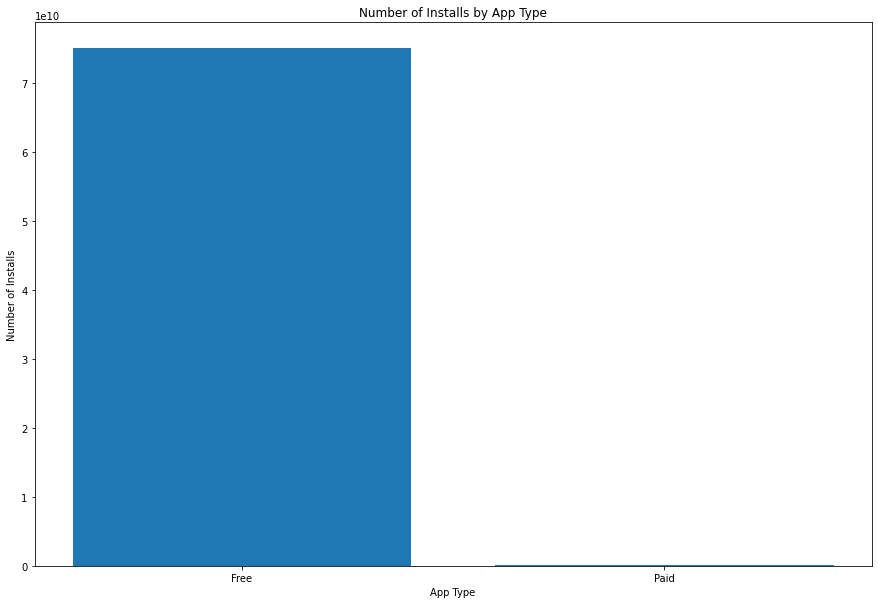

number of free installs: 75064046546 
number of paid installs: 57313871 
the ratio of paid installs to the free installs is: 0.00076 


In [ ]:
labels = ['Free', 'Paid']
values = [free_installs, paid_installs]
plt.rcParams['figure.figsize'] = (15, 10)
plt.bar(labels, values)
plt.title('Number of Installs by App Type')
plt.xlabel('App Type')
plt.ylabel('Number of Installs')
ratio = round(paid_installs/free_installs,5)

plt.show()
print(f'number of free installs: {free_installs} \nnumber of paid installs: {paid_installs} \nthe ratio of paid installs to the free installs is: {ratio} ')


In [ ]:
# heights ratings with respect to category
category_avg_ratings = df.groupby('Category')['Rating'].count()

In [ ]:
category_avg_ratings.head(10)

Category
ART AND DESIGN          63
AUTO AND VEHICLES       85
BEAUTY                  53
BOOKS AND REFERENCE    221
BUSINESS               420
COMICS                  56
COMMUNICATION          315
DATING                 171
EDUCATION              119
ENTERTAINMENT          102
Name: Rating, dtype: int64

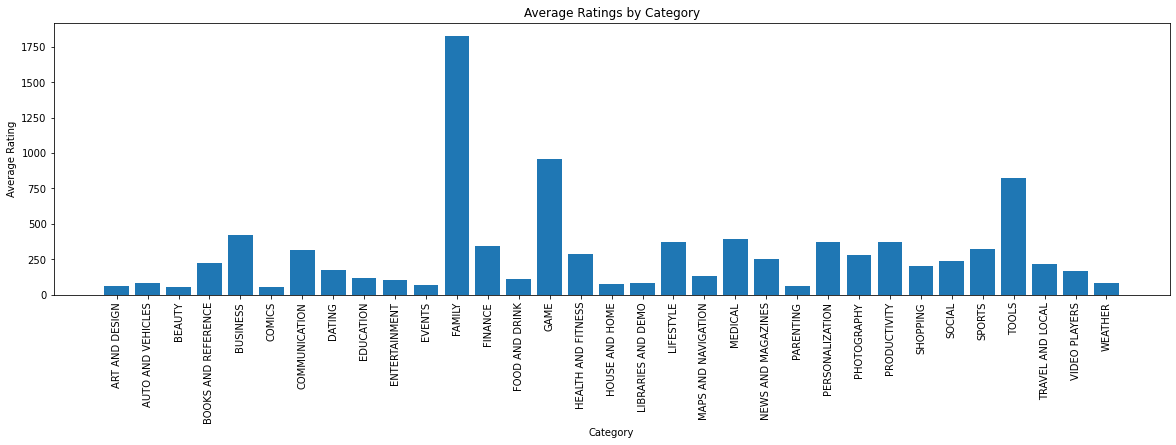

In [ ]:
plt.rcParams['figure.figsize'] = (20, 5)
plt.bar(category_avg_ratings.index, category_avg_ratings.values)
plt.title('Average Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
 
plt.show()


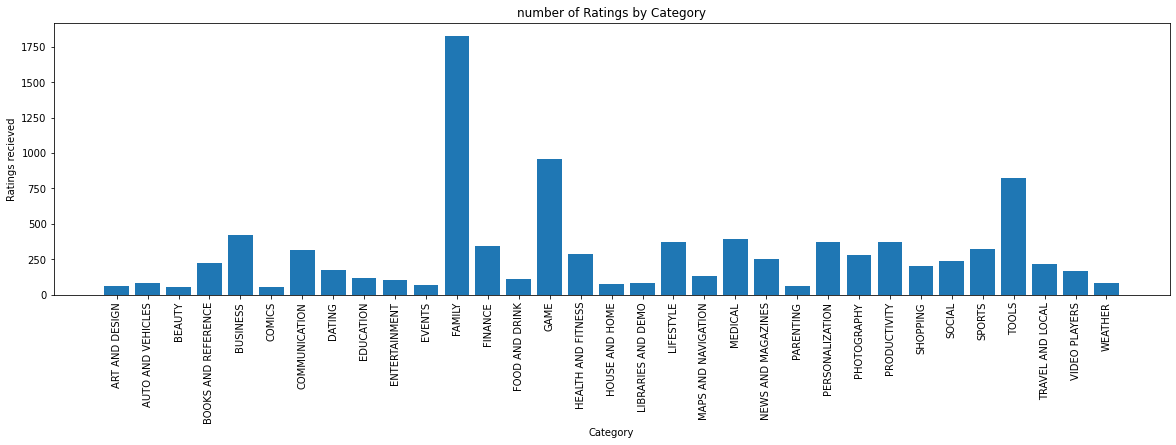

In [ ]:
# heights number of ratings recieved with respect to category
# heights ratings with respect to category
category_ratings_count = df.groupby('Category')['Rating'].count().sort_values(ascending=False)
plt.rcParams['figure.figsize'] = (20, 5)
plt.bar(category_avg_ratings.index, category_avg_ratings.values)
plt.title('number of Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Ratings recieved')
plt.xticks(rotation=90)
plt.show()


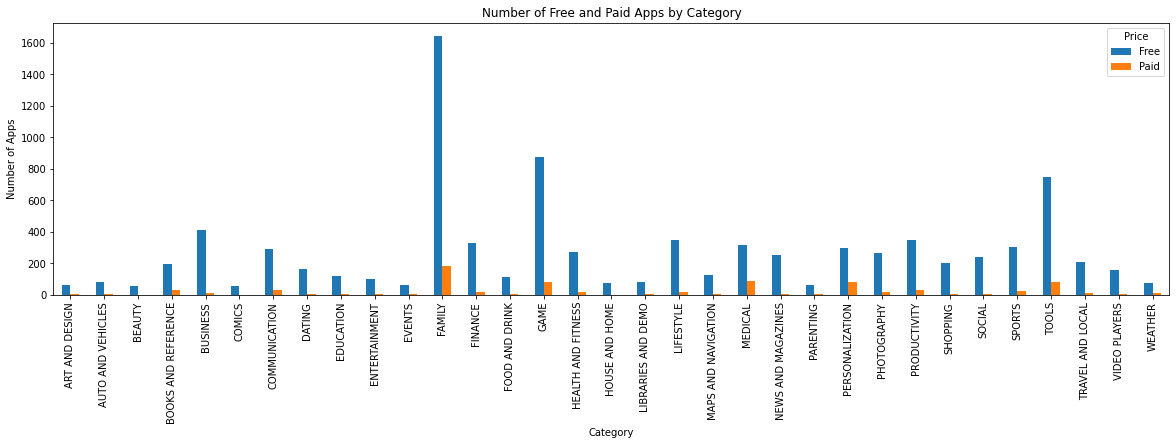

In [ ]:
category_price_counts = df.groupby(['Category', 'Type']).size().unstack()

category_price_counts.plot(kind='bar', stacked=False)
plt.title('Number of Free and Paid Apps by Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.legend(title='Price', loc='upper right')
plt.xticks(rotation=90)
plt.show()


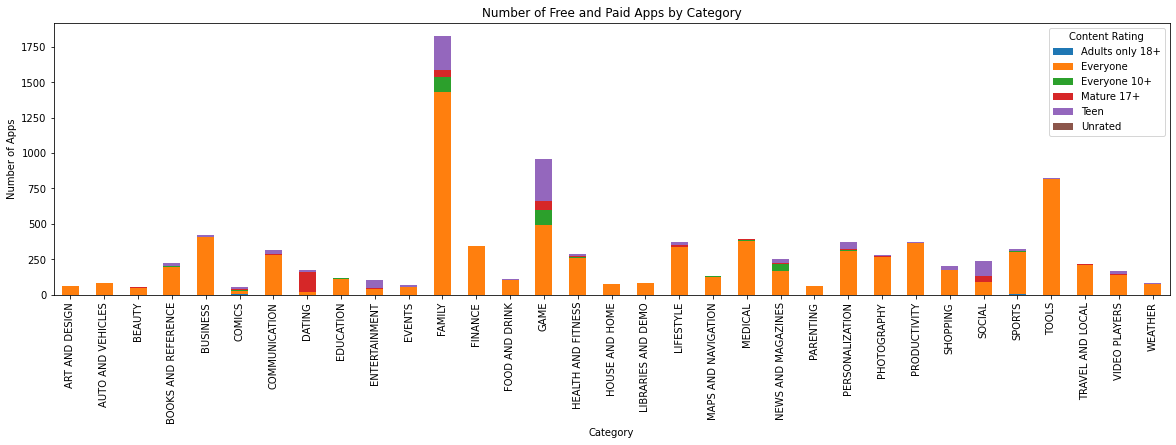

In [ ]:
#working on this dont go into it

sales_fc_fw = df.groupby(['Category', 'Content Rating']).size().unstack()
# print(sales_fc_fw)
sales_fc_fw.plot(kind='bar', stacked=True)
plt.title('Number of Free and Paid Apps by Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.legend(title='Content Rating', loc='upper right')
plt.xticks(rotation=90)
plt.show()

plt.rcParams['figure.figsize'] = (20, 5) #20 identifies length along x axis, and 5 as y axis


<AxesSubplot:>

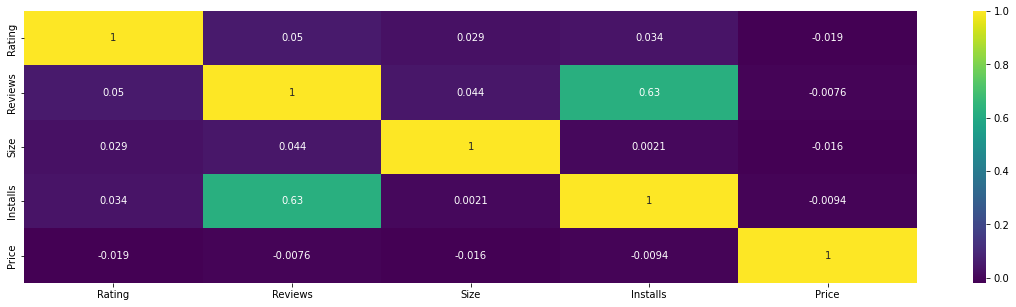

In [ ]:
corr_matrix = df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='viridis')

Stastical information of the given datasets

In [ ]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9648.000000,9.648000e+03,9.648000e+03,9.648000e+03,9648.000000
mean,4.192465,2.168369e+05,1.605215e+07,7.786211e+06,1.100193
std,0.496552,1.832349e+06,2.261499e+07,5.378830e+07,16.861727
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,3.400000e+00,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,2.675000e+05,1.000000e+05,0.000000
75%,4.500000,2.944925e+04,2.500000e+07,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


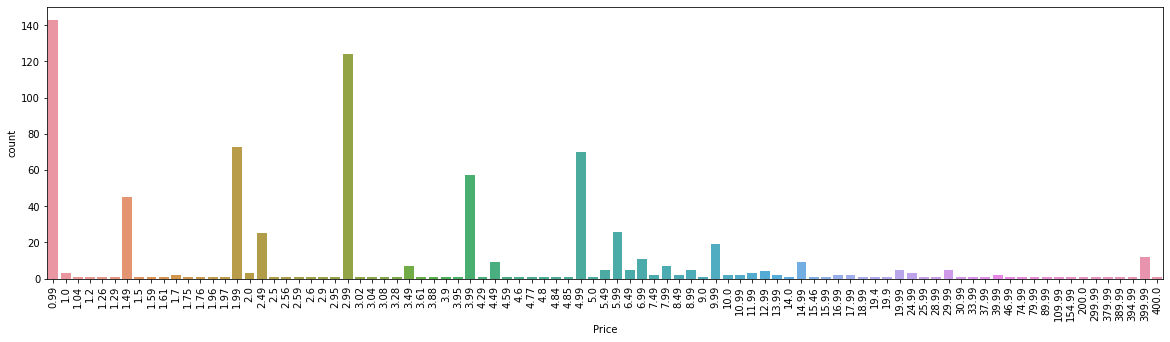

In [ ]:
#the plot shows the paid app counts with respect to price excluding free apps 
#interpretation: we see that max app belong to price = 0.99
free_app_value = 0
df_without_free_apps = df['Price'] != free_app_value
sns.countplot(data=df[df_without_free_apps], x='Price')
plt.rcParams['figure.figsize'] = (20, 5) 
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Category', ylabel='Rating'>

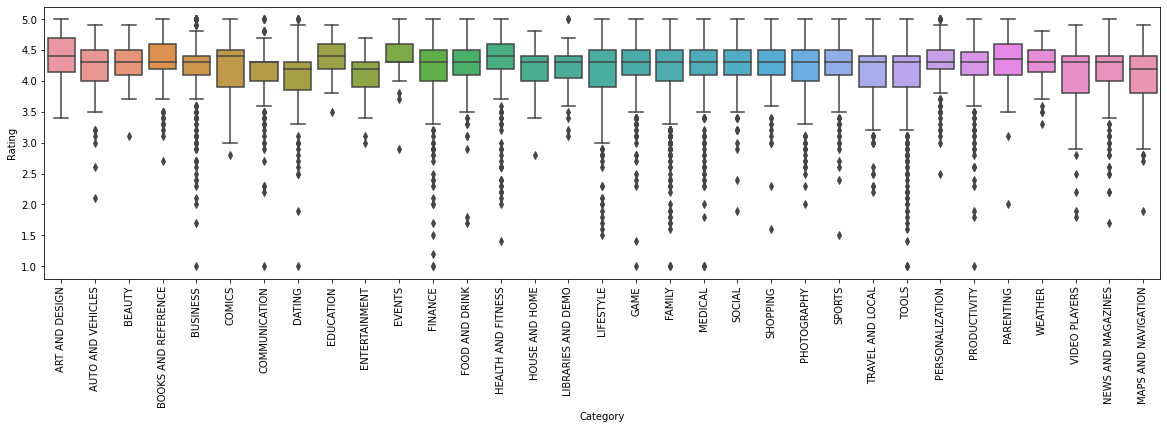

In [ ]:
plt.xticks(rotation=90)
sns.boxplot(data=df, x="Category", y="Rating")


In [ ]:
# sns.kdeplot(x='Price', y='Reviews', data=df)
# sns.jointplot(x='Reviews', y='Price', data=df)


<AxesSubplot:>

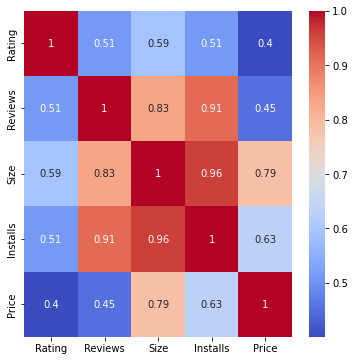

In [ ]:

plt.figure(figsize=(6,6))
rating=df.groupby(['Rating']).sum().reset_index()
corr_ = rating.corr()
# print(rating)
sns.heatmap(corr_, annot=True, cmap='coolwarm')

In [ ]:
cat_total = df['Category']

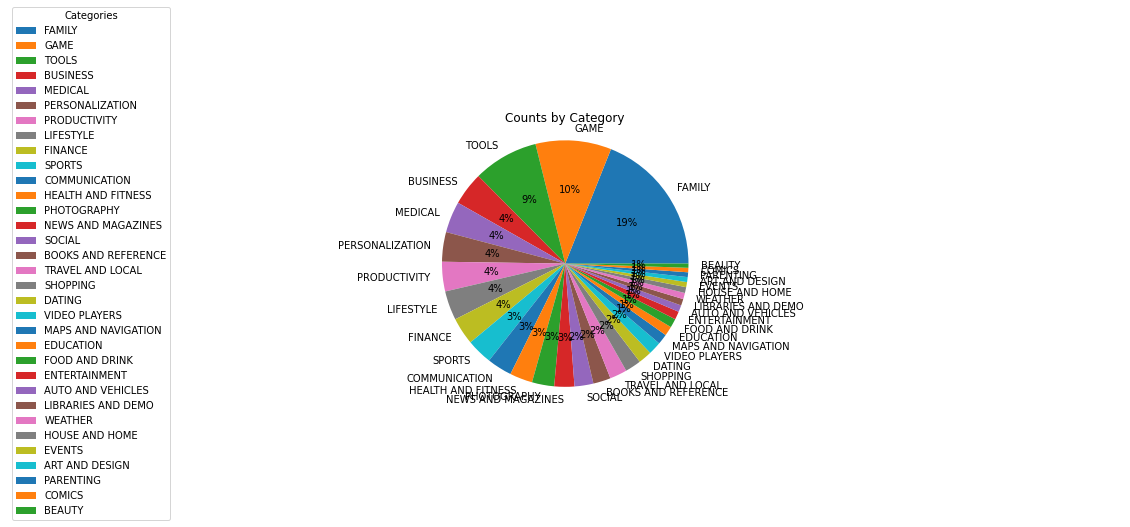

<Figure size 1440x1440 with 0 Axes>

the following categories have max number of apps
  Category  Count
0   FAMILY   1828
1     GAME    959
2    TOOLS    825


In [ ]:
# group the dataframe by Category and count the number of occurrences
grouped_df = df.groupby('Category').size().sort_values(ascending = False).reset_index(name='Count')

# plot a pie chart
plt.pie(grouped_df['Count'], labels=grouped_df['Category'], autopct='%1.f%%')
plt.axis('equal')
plt.title('Counts by Category')
plt.legend(title="Categories", loc="center left")
fig = plt.figure(figsize=(20,20))
plt.show()

# display the grouped dataframe
print('the following categories have max number of apps')
print(grouped_df.head(3))


In [ ]:
# # Top five app with max size
Max_Size = df.sort_values(by='Size', ascending=False)

# display the names and Size in the sorted dataframe
print(Max_Size[['App', 'Size']].head())

                                 App         Size
1275  Talking Babsy Baby: Baby Games  100000000.0
6350                 SimCity BuildIt  100000000.0
1422          Hungry Shark Evolution  100000000.0
4462                 Ultimate Tennis  100000000.0
4559     The Walking Dead: Our World  100000000.0


In [ ]:
# # Top five app with max Reviews
Max_Reviews = df.sort_values(by='Reviews', ascending=False)

# display the names and Reviews in the sorted dataframe
print(Max_Reviews[['App', 'Reviews']].head())

                                           App     Reviews
2000                                  Facebook  78158306.0
299                         WhatsApp Messenger  69119316.0
2001                                 Instagram  66577313.0
298   Messenger – Text and Video Chat for Free  56642847.0
1370                            Clash of Clans  44891723.0


In [ ]:
# # Top five app with max price
Max_Price = df.sort_values(by='Price', ascending=False)

# display the names and Reviews in the sorted dataframe
print(Max_Price[['App', 'Price']].head(10))

                                    App   Price
3467           I'm Rich - Trump Edition  400.00
4413                 I AM RICH PRO PLUS  399.99
4399                 I am rich(premium)  399.99
4392                          I am rich  399.99
4409                          I am Rich  399.99
3463                         💎 I'm rich  399.99
4404     I am rich (Most expensive app)  399.99
8770  I'm Rich/Eu sou Rico/أنا غني/我很有錢  399.99
4402                      I Am Rich Pro  399.99
4398                         I am Rich!  399.99


In [ ]:
#heighest rating for top five free apps and their category
df_Free_apps = df[df['Type'] == 'Free']
df_Free_apps.Type.unique()
Top_5 = df_Free_apps.sort_values(by='Rating', ascending=False)

# display the names and Reviews in the sorted dataframe
print(Top_5[['App', 'Rating', 'Category', 'Type']].head().reset_index())

   index                                      App  Rating        Category  \
0   4192                             Kimbrough AH     5.0         MEDICAL   
1   5048                               Helping BD     5.0       LIFESTYLE   
2   8653                     Dr. ES PV Calculator     5.0           TOOLS   
3   8657          ES Billing System (Offline App)     5.0    PRODUCTIVITY   
4   7762  Spring flowers theme couleurs d t space     5.0  ART AND DESIGN   

   Type  
0  Free  
1  Free  
2  Free  
3  Free  
4  Free  


In [ ]:
#heighest rating for top five paid apps and their category
df_Paid_apps = df[df['Type'] == 'Paid']
df_Paid_apps.Type.unique()
Top_5 = df_Paid_apps.sort_values(by='Rating', ascending=False)

# display the names and Ratings in the sorted dataframe
print(Top_5[['App', 'Rating', 'Type']].head().reset_index())

   index                                                App  Rating  Type
0   3143                                       ADS-B Driver     5.0  Paid
1   7423                                   DL Image Manager     5.0  Paid
2   6945  30WPM Amateur ham radio Koch CW Morse code tra...     5.0  Paid
3   6941                                       Morse Player     5.0  Paid
4   4279                             Hey AJ! It's Saturday!     5.0  Paid


In [ ]:
df.Type.unique()

array(['Free', 'Paid'], dtype=object)

<AxesSubplot:xlabel='Rating', ylabel='Count'>

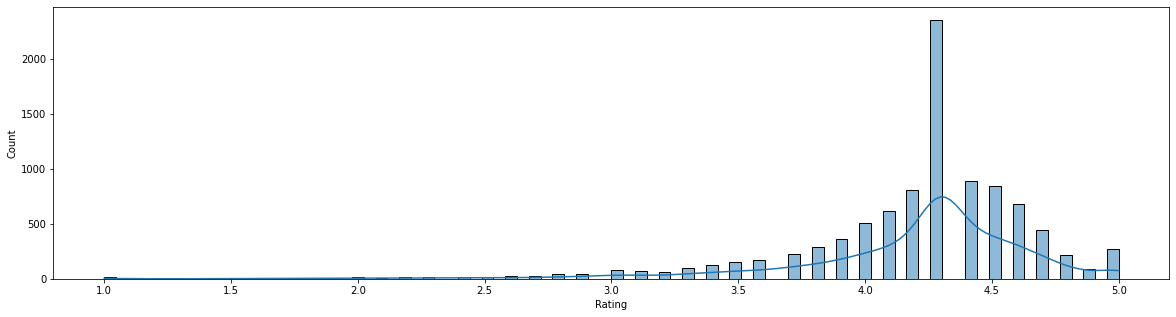

In [ ]:
#distribution of ratings across various apps
sns.histplot(df, x='Rating', kde=True)

In [ ]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART AND DESIGN,4.1,159.0,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART AND DESIGN,3.9,967.0,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART AND DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART AND DESIGN,4.5,215644.0,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART AND DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART AND DESIGN,4.4,167.0,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART AND DESIGN,3.8,178.0,19000000.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART AND DESIGN,4.1,36815.0,29000000.0,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART AND DESIGN,4.4,13791.0,33000000.0,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART AND DESIGN,4.7,121.0,3.1,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [ ]:
def get_year(x):
  x = x[-4:]
  return x

In [ ]:
df['year'] = df['Last Updated'].apply(get_year)

<AxesSubplot:xlabel='year', ylabel='Count'>

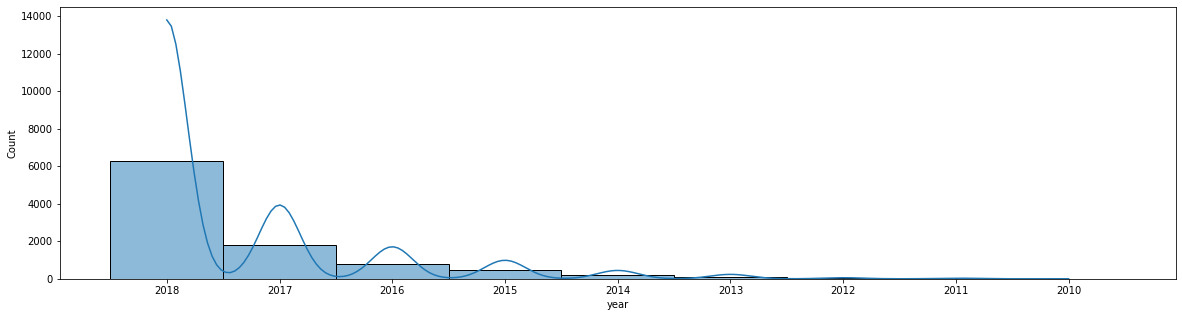

In [ ]:
#distribution of the latest apps that are updated
sorted_by_year = df.sort_values(by = 'year', ascending = False)
sns.histplot(sorted_by_year, x='year', kde=True)

In [ ]:
df.Category.unique()

array(['ART AND DESIGN', 'AUTO AND VEHICLES', 'BEAUTY',
       'BOOKS AND REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD AND DRINK', 'HEALTH AND FITNESS', 'HOUSE AND HOME',
       'LIBRARIES AND DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL AND LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO PLAYERS', 'NEWS AND MAGAZINES', 'MAPS AND NAVIGATION'],
      dtype=object)

TypeError: ignored

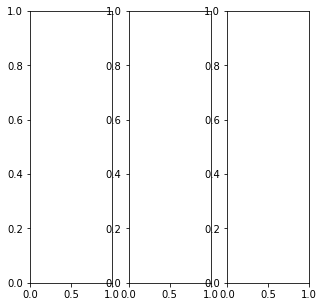

In [ ]:
test = df.groupby(['Category' , 'Type']).count().reset_index()
# sns.heatmap(test, cmap='YlGnBu')
fig, axs = plt.subplots(1, 3, figsize=(5, 5))
# test.index = pd.Categorical(test.index)

# category = input("enter the category")
# plt.rcParams['figure.figsize'] = (5, 5) 
# test.loc[category].plot(kind='bar')
# # fig, axs = plt.subplots(1, 1, figsize=(5, 5))
# plt.title(f'{category}  - Counts by Type')
# plt.xlabel('Type')
# plt.ylabel('Count')
# plt.show()

# Loop through each category and create a bar plot of the counts for each type in a separate subplot
for category in test.index:
    plt.rcParams['figure.figsize'] = (5, 5) 
    test.loc[category].plot(kind='bar')
    # fig, axs = plt.subplots(1, 1, figsize=(5, 5))
    plt.title(f'{category} - Counts by Type')
    plt.xlabel('Type')
    plt.ylabel('Count')
    plt.show()
# test.plot(kind='bar', stacked = False)


# these can be plotted using bar as for pie we are having some colums as zero for paid installs and shall give error while ploting the same

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


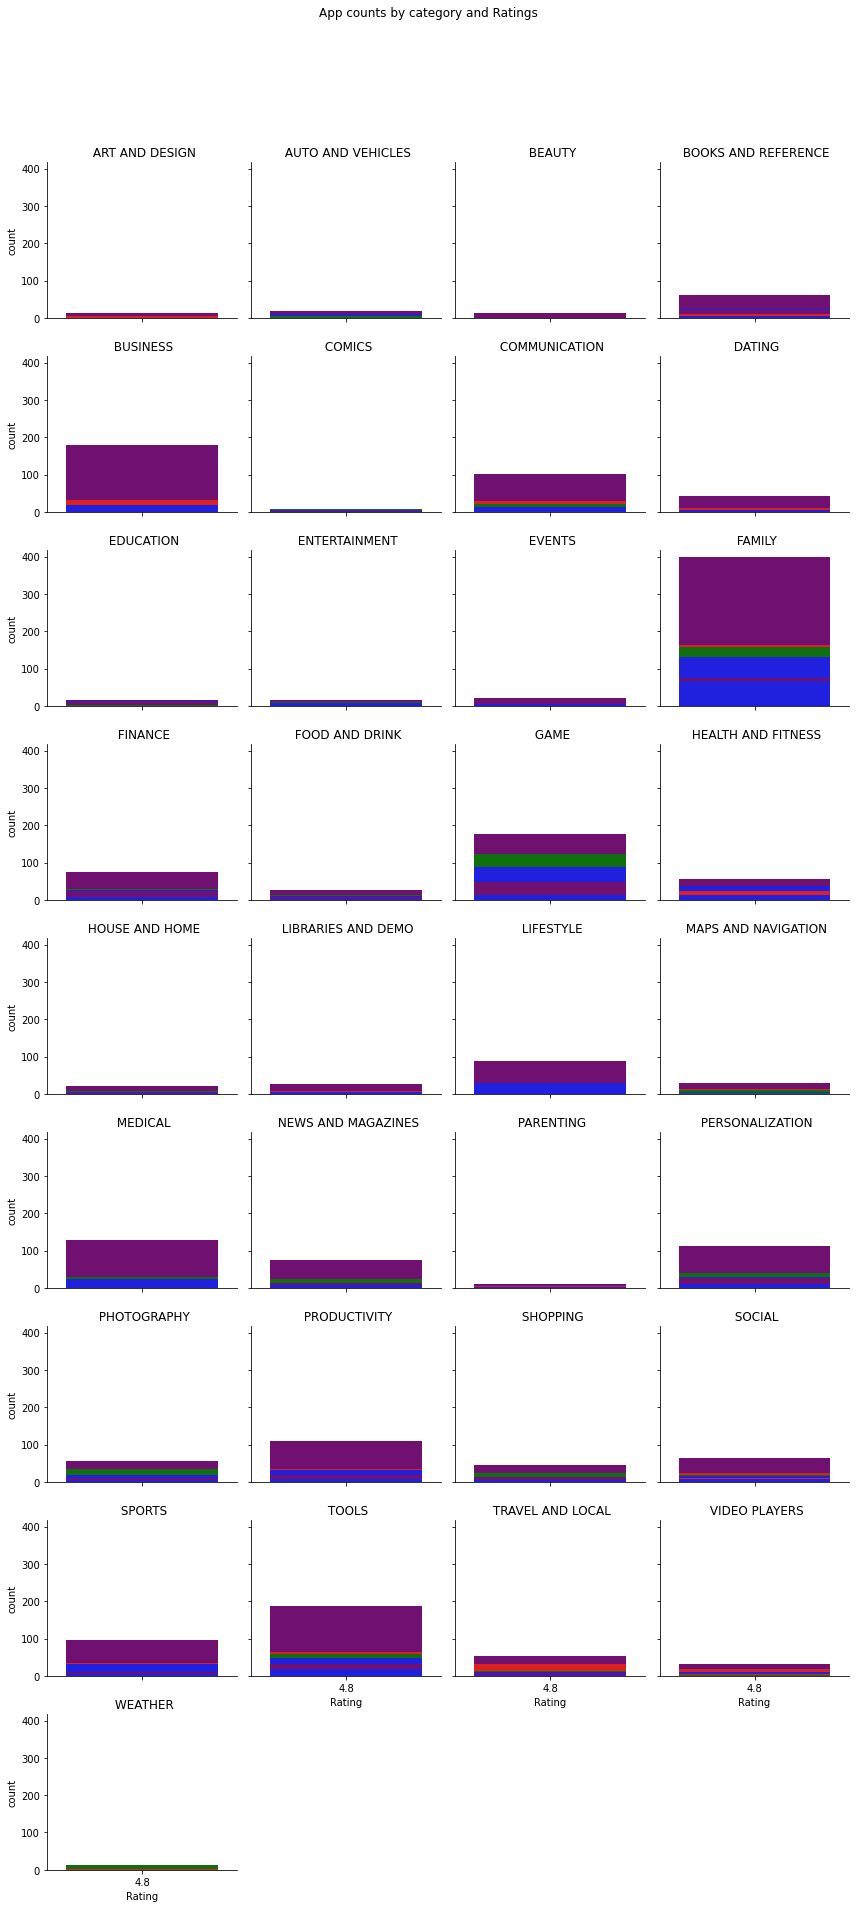

In [ ]:
# Group the data by category and type
test = df.groupby(['Category', 'Rating']).size()

# Convert the series to a dataframe and reset the index
test = test.reset_index(name='count')

# Create the grid of bar plots
colors = ['red', 'green', 'blue', 'purple']
g = sns.FacetGrid(test, col='Category', hue='Rating', palette=colors, col_wrap=4)
g.map(sns.barplot, 'Rating', 'count')

# Add titles for each plot
for ax in g.axes.flat:
    ax.set_title(ax.get_title().split('=')[1])

# Set the overall title for the plot grid
plt.subplots_adjust(top=0.9)
g.fig.suptitle('App counts by category and Ratings')

# Show the plot
plt.show()

In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'year'],
      dtype='object')

In [ ]:
df.Size.min()

0.0

In [ ]:
df.size.max()

135072

In [ ]:
def group_by_size(val):
  ''''
  This function help to categories the size from 101304 to 0
  as Extra Large App, Large App, Medium Size App and Lite Size App
  '''
  if val>=101304.0:
    return 'Extra Large App'
  elif val >= 67536.0 and val<101304.0:
    return 'Large App'
  elif val >= 33768.0 and val<67536:
    return 'Medium Size App'
  else:
    return 'Lite Size App'

In [ ]:
df['Size Groups'] = df['Size'].apply(group_by_size)

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year,Size Groups
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART AND DESIGN,4.1,159.0,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018,Extra Large App
1,Coloring book moana,ART AND DESIGN,3.9,967.0,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018,Extra Large App
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART AND DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018,Lite Size App
3,Sketch - Draw & Paint,ART AND DESIGN,4.5,215644.0,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018,Extra Large App
4,Pixel Draw - Number Art Coloring Book,ART AND DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018,Lite Size App


<AxesSubplot:ylabel='Installs'>

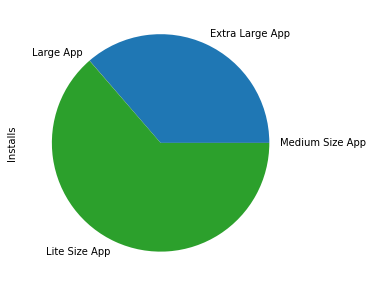

In [ ]:

plt.rcParams['figure.figsize'] = (20, 5) 
size_group_df = df.groupby(['Size Groups'])['Installs'].sum()
size_group_df.plot.pie()


#we infer that most of the people prefer to have lite size apps

Text(0, 0.5, 'Total Installs in Billions')

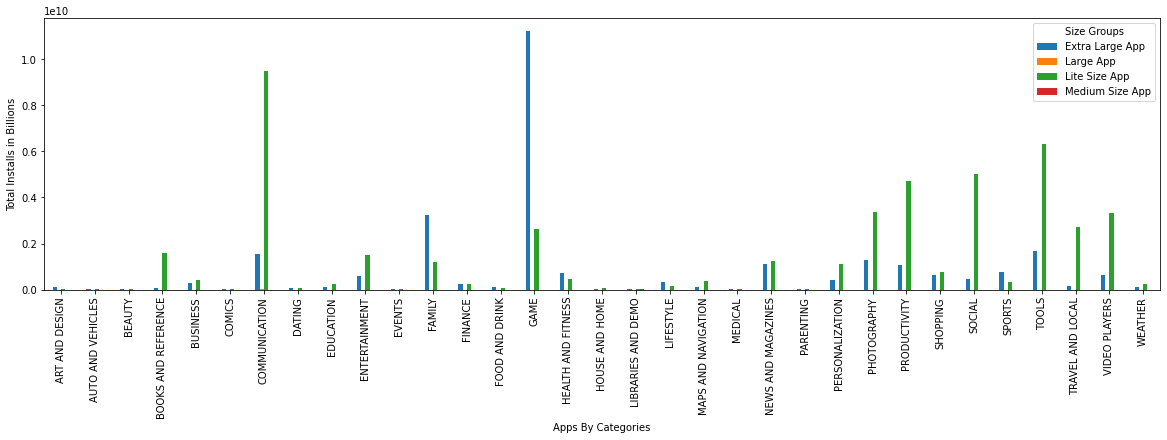

In [ ]:

plt.rcParams['figure.figsize'] = (20, 5) 
size_groupby_Categories_df = df.groupby(['Category', 'Size Groups'])['Installs'].sum().unstack()

size_groupby_Categories_df.plot.bar()
plt.xlabel('Apps By Categories')
plt.ylabel('Total Installs in Billions')


#we infer that most of the gaming apps are extra large and people prefer lite size apps for communication people prefer to have lite size apps

In [ ]:
size_groupby_Categories_df.head()

Size Groups,Extra Large App,Large App,Lite Size App,Medium Size App
Category,,,,
ART AND DESIGN,91455000.0,NaN,2.287810e+07,NaN
AUTO AND VEHICLES,35180876.0,NaN,1.794934e+07,NaN
BEAUTY,6895300.0,NaN,2.030175e+07,NaN
BOOKS AND REFERENCE,64750386.0,1000000.0,1.600218e+09,NaN
BUSINESS,299701600.0,NaN,3.974023e+08,61000.0


<AxesSubplot:xlabel='Size Groups', ylabel='Rating'>

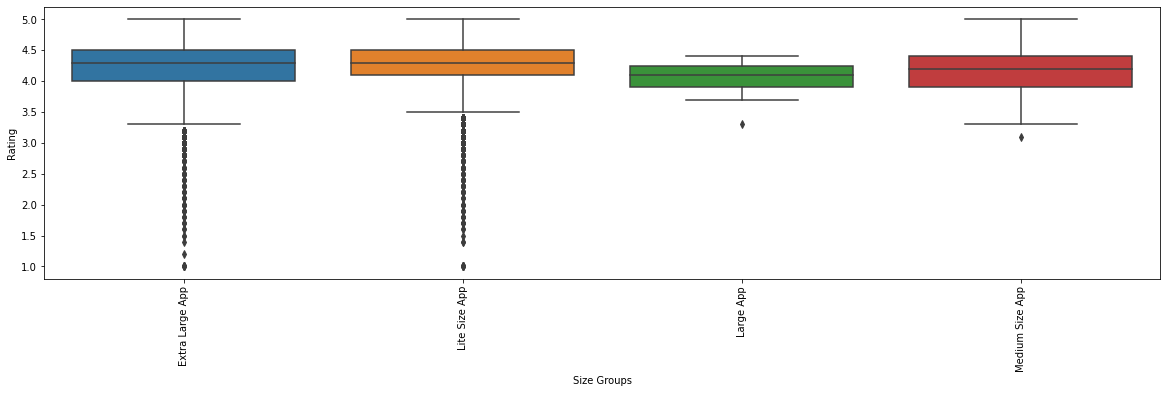

In [ ]:
okplt.xticks(rotation=90)
sns.boxplot(data=df, y="Rating", x="Size Groups")